In [74]:
from pylab import rcParams
from osgeo import gdal
import mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# import numpy as np
import random as random
# import matplotlib.pyplot as plt
import time
import pandas as pd
import math
from scipy.spatial import distance#
from pyproj import Proj,transform
import seaborn as sns
import copy
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import multiprocessing
from datetime import datetime

## Previous Cases

In [75]:
Data=pd.read_csv("Case_data/cases.csv",sep = ',', header = 0)

In [76]:
Data_bang = Data[Data['country'] == 'B'].reset_index(drop = True)

In [77]:
# Data_bang

#### read date

In [33]:
# months = []
# years = []
# monthe = []
# yeare = []
# for i in range(len(Data)):
#     months.append(int(float(Data['Start'].values[i].split('/')[0])))
#     years.append(int(float(Data['Start'].values[i].split('/')[1])))
#     monthe.append(int(float(Data['End'].values[i].split('/')[0])))
#     yeare.append(int(float(Data['End'].values[i].split('/')[1])))

In [34]:
# Data['Sm'] = months
# Data['Sy'] = years
# Data['Em'] = monthe
# Data['Ey'] = yeare
print(Data_bang['Start'][1])
datetime.strptime(Data_bang['Start'][1], date_format)

01/01/03


datetime.datetime(2003, 1, 1, 0, 0)

In [35]:
Data_bang

,Start,End,where,country,Recovered,Deaths,Total Cases,Lat,Long,reference,Unnamed: 10
0,01/04/01,30/05/01,Meherpur,B,4,9,13,23.805199,88.672358,Start-end guess,NaN
1,01/01/03,31/01/03,Naogaon,B,4,8,12,24.913160,88.753095,Start-end guess,NaN
2,04/01/04,08/02/04,Goalando,B,7,22,29,23.684042,89.699655,http://www.who.int/csr/don/2004_02_12/en/,NaN
3,19/02/04,16/04/04,Faridpur,B,9,27,36,23.542392,89.630892,http://www.who.int/csr/don/2004_04_20/en/ And ...,NaN
4,02/01/05,16/01/05,Tangail,B,1,11,12,24.251345,89.916710,Understanding all Steps of\nNipah Virus Transm...,NaN
5,21/01/07,08/02/07,Thakurgaon,B,4,3,7,26.041839,88.428262,Nipah virus outbreak with person-to-person tra...,NaN
6,01/03/07,30/04/07,Kushtia,B,3,5,8,23.890700,89.109937,NaN,NaN
7,20/02/08,24/03/08,Manikgonj,B,2,4,6,26.301683,88.734965,"death/alive made up, Date Palm Sap Linked to N...",NaN
8,20/02/08,26/03/08,Rajbari,B,3,2,5,22.642992,88.422346,"death/alive made up, Date Palm Sap Linked to N...",NaN
9,01/01/09,01/02/09,Gaibandha,B,1,0,1,25.329693,89.542965,NaN,NaN


In [78]:
date_format = "%d/%m/%y"
duration = []
for i in range(len(Data_bang)):
    a = datetime.strptime(Data_bang['Start'][i], date_format)
    b = datetime.strptime(Data_bang['End'][i], date_format)
    delta = b - a
    duration.append(delta.days)

In [79]:
Data_bang['Duration'] = duration
Data_bang

,Start,End,where,country,Recovered,Deaths,Total Cases,Lat,Long,reference,Unnamed: 10,Duration
0,01/04/01,30/05/01,Meherpur,B,4,9,13,23.805199,88.672358,Start-end guess,NaN,59
1,01/01/03,31/01/03,Naogaon,B,4,8,12,24.913160,88.753095,Start-end guess,NaN,30
2,04/01/04,08/02/04,Goalando,B,7,22,29,23.684042,89.699655,http://www.who.int/csr/don/2004_02_12/en/,NaN,35
3,19/02/04,16/04/04,Faridpur,B,9,27,36,23.542392,89.630892,http://www.who.int/csr/don/2004_04_20/en/ And ...,NaN,57
4,02/01/05,16/01/05,Tangail,B,1,11,12,24.251345,89.916710,Understanding all Steps of\nNipah Virus Transm...,NaN,14
5,21/01/07,08/02/07,Thakurgaon,B,4,3,7,26.041839,88.428262,Nipah virus outbreak with person-to-person tra...,NaN,18
6,01/03/07,30/04/07,Kushtia,B,3,5,8,23.890700,89.109937,NaN,NaN,60
7,20/02/08,24/03/08,Manikgonj,B,2,4,6,26.301683,88.734965,"death/alive made up, Date Palm Sap Linked to N...",NaN,33
8,01/01/09,01/02/09,Gaibandha,B,1,0,1,25.329693,89.542965,NaN,NaN,31
9,01/01/09,01/02/09,Rangpur,B,1,0,1,25.743892,89.275227,NaN,NaN,31


In [80]:
lons_india = Data['Long'][Data['country'] == 'I'].values
lats_india =Data['Lat'][Data['country'] == 'I'].values
lons_ban = Data['Long'][Data['country'] == 'B'].values
lats_ban =Data['Lat'][Data['country'] == 'B'].values

In [39]:
sum(Data['country']=='B')

53

In [40]:
Case = [] #appends each day (so that the classes can be colour coordinated)
for year in range(1999, max(Data['Ey'])+1):
    for month in range(1,13):
        c = []
        for k in Data[Data['Sy'] == year].index.values:
            if Data.loc[k]['Em']>=month>=Data.loc[k]['Sm']:
                c.append(k)
        Case.append(c)

KeyError: 'Ey'

# Plots

Text(0,0.5,'Final Size')

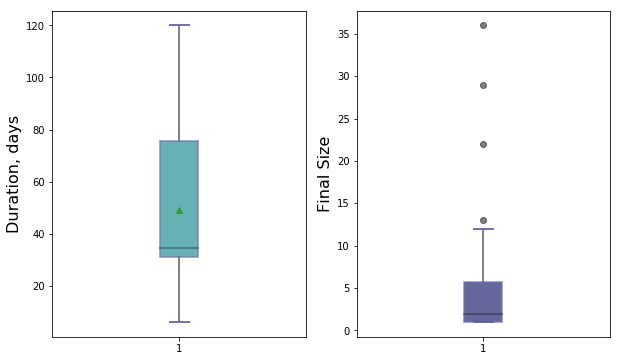

In [71]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(121)
bp = ax.boxplot(Data_bang['Duration'].values, patch_artist=True, showmeans = True)
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = 'teal' , alpha = 0.6)

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='grey', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', alpha = 0.3, linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='yellow', alpha=0.5)

plt.ylabel('Duration, days', fontsize =16)
# plt.ylim([0,40])
ax = fig.add_subplot(122)
bp = ax.boxplot(Data_bang['Total Cases'].values, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#00035b' , alpha = 0.6)

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='grey', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', alpha = 0.3, linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='yellow', alpha=0.5)

plt.ylabel('Final Size', fontsize = 16)

Text(0,0.5,'Duration')

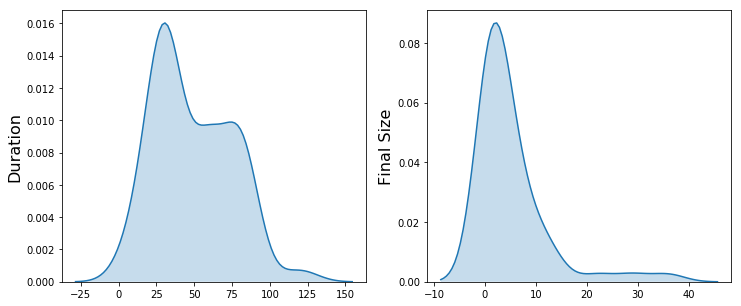

In [72]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,2)
sns.kdeplot(Data_bang['Total Cases'].values, shade = True)
plt.ylabel('Final Size', fontsize = 16)
plt.subplot(1,2,1)
sns.kdeplot(Data_bang['Duration'].values, shade = True)
plt.ylabel('Duration', fontsize =16)

# Maps

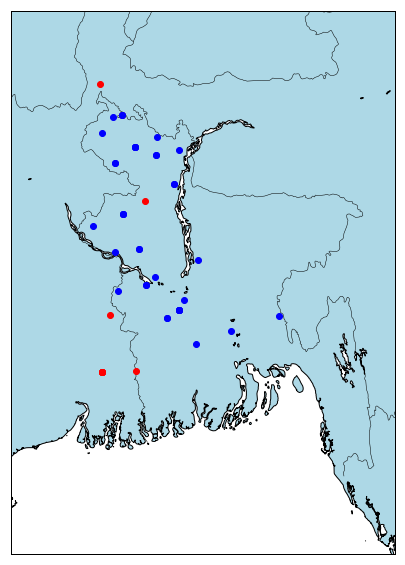

In [10]:
plt.figure(figsize = (10,10))
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.05,
    llcrnrlon=87, llcrnrlat=20.0,
    urcrnrlon=93, urcrnrlat=27.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'lightblue')
my_map.drawmapboundary()
 
# lons = [-135.3318, -134.8331, -134.6572]
# lats = [57.0799, 57.0894, 56.2399]
# xcoord[Case[2]], ycoord[Case[2]]
x_i,y_i = my_map(lons_india, lats_india)
my_map.plot(x_i, y_i, 'o', color = 'red', markersize=6)

# my_map.plot(my_map(xcoord[Case[25]], ycoord[Case[25]])[0],my_map(xcoord[Case[25]], ycoord[Case[25]])[1] , 'bo', markersize=6, color = 'red')
x_b,y_b = my_map(lons_ban, lats_ban)
my_map.plot(x_b, y_b, 'bo', markersize=6)
 
plt.show()

## Raster files

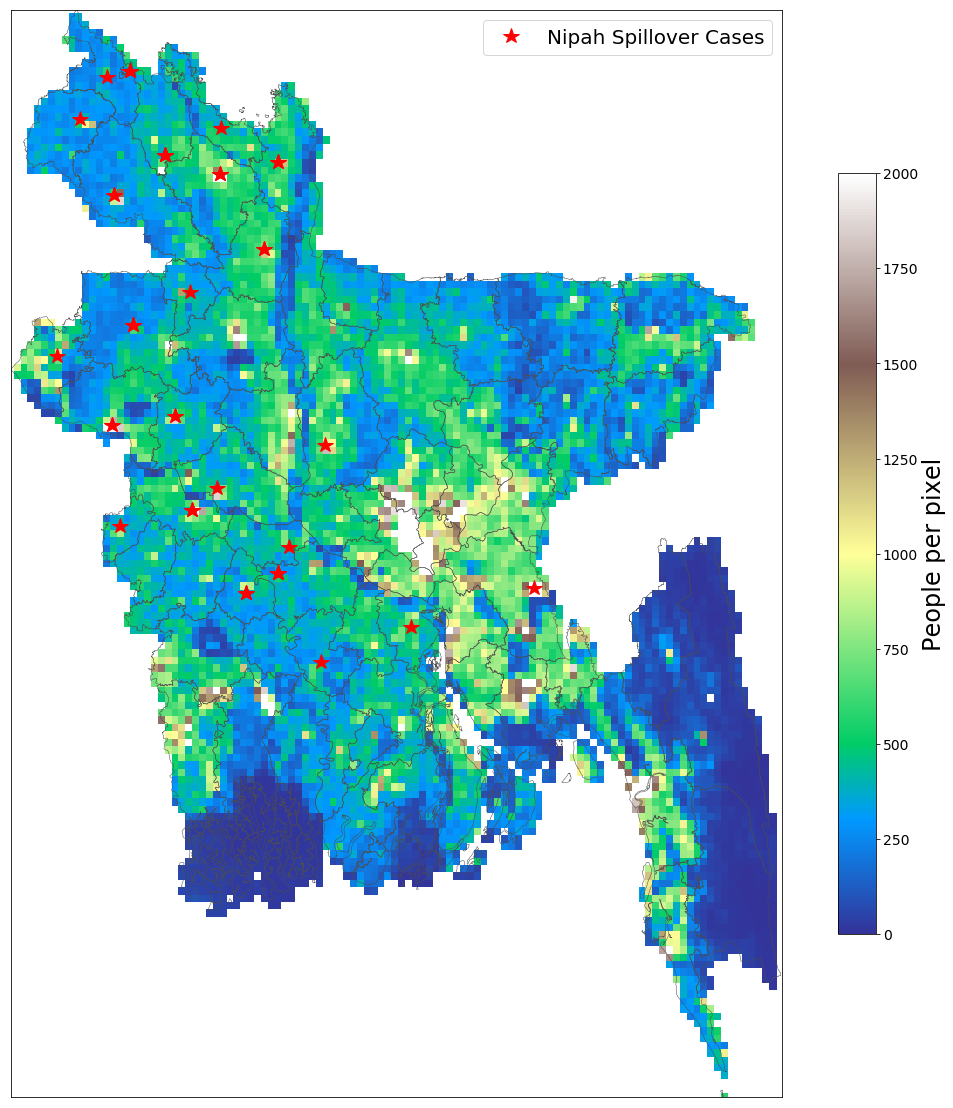

In [73]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
# pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/BGD_ppp_2010_adj_v2.tif'
# pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/BGD_ppp_UTM44.bil'
#change r5 to change resolution
pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/output_r5_ac.tif'
# pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/output_r50_ac.tif'

scale = 50 #scale of resolution to 100m
gdata = gdal.Open(pathToRaster)


geo = gdata.GetGeoTransform()
data = gdata.GetRasterBand(1).ReadAsArray()
xres = geo[1]
yres = geo[5]


m =Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.05,
    llcrnrlon=88.0082, llcrnrlat=20.5945716,
    urcrnrlon=92.6882407, urcrnrlat=26.6345716)

# m.readshapefile(r'../Downloads/bgd_border/bgd_admbnda_adm3_bbs_20180410','boundaries',drawbounds=True, color='0.3')
m.readshapefile(r'../Downloads/bgd_admbnda_adm2_bbs_20180410/bgd_admbnda_adm2_bbs_20180410','boundaries',drawbounds=True, color='0.3')

xmin = geo[0] + xres * 0.5
xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
ymax = geo[3] - yres * 0.5

x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
x,y = m(x,y)

cmap = plt.cm.terrain

cmap.set_under ('1.0')
cmap.set_bad('0.8')

im = m.pcolormesh(x,y, (data.T)*scale, cmap=cmap, vmin = 0, vmax = 2000)

cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)
cb.ax.tick_params(labelsize=14)
cb.set_label(r"People per pixel", size=24)

band = gdata.GetRasterBand(1)
stats = band.ComputeStatistics(0)
stats=[x*scale for x in stats]
# plt.title(" Minimum={}, Maximum={}, \n Mean={}, StdDev={}".format( stats[0], stats[1], stats[2], stats[3] ), fontsize = 16)

# x_f, y_f = m(long_dc, lat_dc)
x_b,y_b = m(lons_ban, lats_ban)
m.plot(x_b, y_b, marker = '*', markersize=16, color = 'red', linestyle ='', label ='Nipah Spillover Cases')
# m.plot(x_f, y_f, marker = '*', markersize = 16, color = 'red', linestyle = '', label = 'Nipah Cases')

plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

In [65]:
Data_bang[Data_bang['Lat']==min(Data_bang['Lat'])]

Data_bang[Data_bang['where']=='Rajbari']['country'] = 'I'
Data_bang[Data_bang['where']=='Rajbari']['country'] = 'I'

/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [43]:
lat_f = Data_bang[Data_bang['where'] == 'Faridpur']['Lat'].unique()
long_f = Data_bang[Data_bang['where'] == 'Faridpur']['Long'].unique()

In [47]:
detailed_cases = Data_bang.iloc[[3,4,5,12,15,17,22,39]]
long_dc = detailed_cases['Long'].unique()
lat_dc = detailed_cases['Lat'].unique()

In [55]:
detailed_cases['Total Cases']

sum(Data_bang['Total Cases'].values)

detailed_cases['Total Cases'].values/262

array([0.13740458, 0.04580153, 0.02671756, 0.03053435, 0.08396947,
       0.03053435, 0.04580153, 0.01526718])

In [ ]:
# cols = gdata.RasterXSize
rows = gdata.RasterYSize

# transform = dataset.GetGeoTransform()

xOrigin = geo[0]
yOrigin = geo[3]
pixelWidth = geo[1]
pixelHeight = -geo[5]

data = band.ReadAsArray(0, 0, cols, rows)
points_list = [(long_f, lat_f)]

# points_list = [ (355278.165927, 4473095.13829), (355978.319525, 4472871.11636) ] #list of X,Y coordinates

for point in points_list:
    col = int((point[0] - xOrigin) / pixelWidth)
    row = int((yOrigin - point[1] ) / pixelHeight)

    print(row,col, data[row][col])

## Video

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.05,
    llcrnrlon=87, llcrnrlat=20.0,
    urcrnrlon=93, urcrnrlat=27.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'lightblue')
my_map.drawmapboundary()

line1, = my_map.plot([], [], 'bo', markersize=6, color = 'red')

time_text = ax.text(0.05, 1.05, '', transform=ax.transAxes, color = 'k', fontsize = 30)


# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])

    time_text.set_text('')
    return line1, 

def animate(i):
    line1.set_data(my_map(xcoord[Case[i]], ycoord[Case[i]])[0],my_map(xcoord[Case[i]], ycoord[Case[i]])[1])
    time_text.set_text('Year {}, Month {}'.format(1999+int(i/12), (i % 12)+1))

    return line1, time_text

# call the animator, frames*(1/fps) is the speed of the animation.
# set number of frames to the length of your list of dataframes
anim = animation.FuncAnimation(fig, animate, frames=len(Case), init_func=init, interval=20, blit=True)

plt.xticks([])
plt.yticks([])

anim.save('Case.mp4', fps=8)

In [22]:
Data.to_csv('cases_durations.csv', sep=',')


# case breakdowns

- 2004_F_cases.ods
- 2005_T_cases.ods
- 2007_T_cases.ods
- 2011_Faridpur_cases.ods
- 2011_Lalmonirhat_cases.ods
- 2011_Rangpur_cases.ods
- 2012_Joypurhat_cases.ods
- 2012_rajshiahi_cases.ods
- 2014_rangpur_cases.ods  


In [84]:
#####################################################################################
############################### DATASETS ############################################
#####################################################################################

Data_F04=pd.read_csv("Case_data/2004_F_cases.csv",sep = ',', header = 0)
Data_T05=pd.read_csv("Case_data/2005_T_cases.csv",sep = ',', header = 0)
Data_T07=pd.read_csv("Case_data/2007_T_cases.csv",sep = ',', header = 0)
Data_F10=pd.read_csv("Case_data/2010_faridpur_cases.csv",sep = ',', header = 0)
Data_F11=pd.read_csv("Case_data/2011_Faridpur_cases.csv",sep = ',', header = 0)
Data_L11=pd.read_csv("Case_data/2011_Lalmonirhat_cases.csv",sep = ',', header = 0)
Data_R11=pd.read_csv("Case_data/2011_Rangpur_cases.csv",sep = ',', header = 0)
Data_J12=pd.read_csv("Case_data/2012_Joypurhat_cases.csv",sep = ',', header = 0)
Data_R12=pd.read_csv("Case_data/2012_rajshiahi_cases.csv",sep = ',', header = 0)
Data_R14=pd.read_csv("Case_data/2014_rangpur_cases.csv",sep = ',', header = 0)

############################# Spacing ##############################################

def Spacing(dataset):
    record = []
    record.append(datetime.strptime(dataset['Date'][0], date_format).day)
    for i in range(1, len(dataset)):
        record.append(record[i-1]+(datetime.strptime(dataset['Date'][i], date_format)-datetime.strptime(dataset['Date'][i-1], date_format)).days) 
    return record
# print(Data_L11)
Rec_F04=Spacing(Data_F04)
Rec_T05=Spacing(Data_T05)
Rec_T07=Spacing(Data_T07)
Rec_F10 = Spacing(Data_F10)
Rec_F11=Spacing(Data_F11)
Rec_L11=Spacing(Data_L11)
Rec_R11=Spacing(Data_R11)
Rec_J12=Spacing(Data_J12)
Rec_R12=Spacing(Data_R12)
Rec_R14=Spacing(Data_R14)
names = ['2004 Faridpur', '2005 Tangail', '2007 Thakurgaon', '2010 Faridpur',
         '2011 Faridpur', '2011 Lalmonirhat', '2011 Rangpur', '2012 Joypurhat', '2012 Rajshiahi', '2014 Rangpur' ]
records = [Rec_F04, Rec_T05, Rec_T07,Rec_F10, Rec_F11, Rec_L11, Rec_R11, Rec_J12, Rec_R12, Rec_R14]
data = [Data_F04, Data_T05, Data_T07, Data_F10, Data_F11, Data_L11, Data_R11, Data_J12, Data_R12, Data_R14]

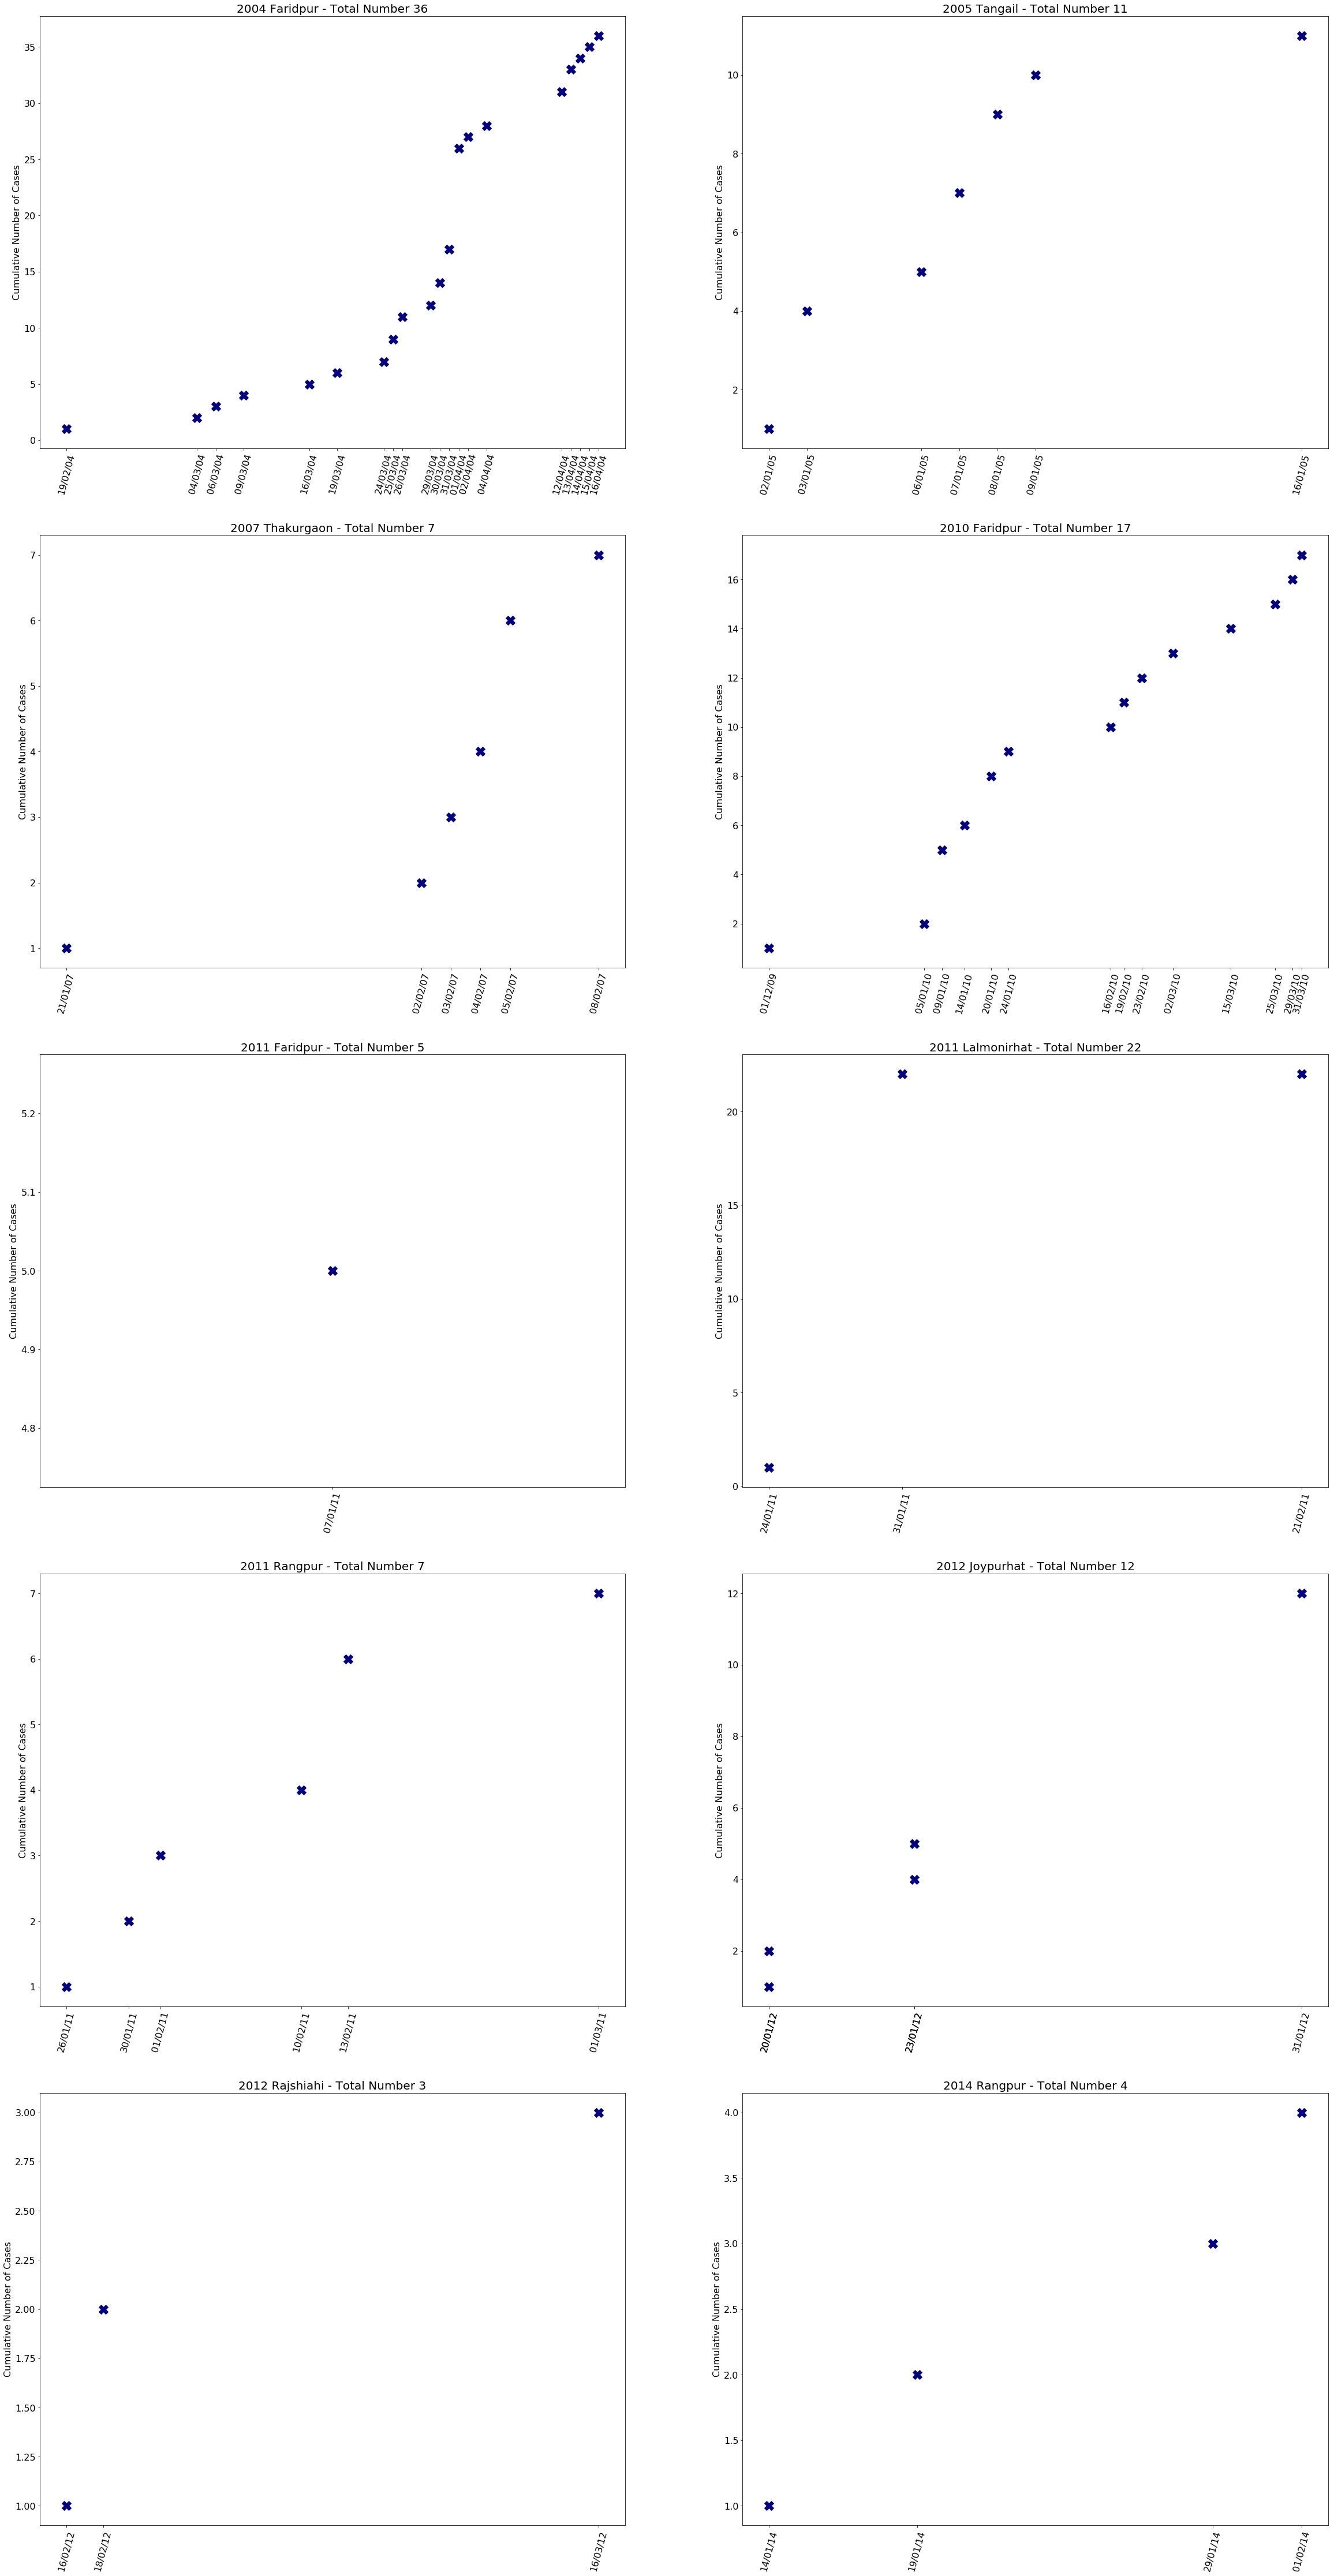

In [89]:
plt.figure(figsize = (40,80))
# plt.subplot(5,2,1)
# plt.plot(Rec_F04, Data_F04['CumsumInf'], 'x', markersize = 16, color = 'navy')
# plt.xticks(Rec_F04, Data_F04['Date'], rotation = 90, fontsize = 16)
# plt.yticks(fontsize = 16)
# plt.ylabel('Cumulative Number of Cases', fontsize = 16)
# plt.title('2004 Faridpur', fontsize = 20)
for k in range(len(data)):
    plt.subplot(5,2,k+1)
    plt.plot(records[k], data[k]['CumsumInf'], 'X', markersize = 16, color = 'navy');
    plt.xticks(records[k], data[k]['Date'], rotation = 75, fontsize = 16);
    plt.yticks(fontsize = 16)
    plt.ylabel('Cumulative Number of Cases', fontsize = 16)
    plt.title('{} - Total Number {}'.format(names[k], data[k]['CumsumInf'].values[-1]), fontsize = 20)
#     plt.show(True)



In [58]:
# Data_F04['CumsumInf']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      9
8     11
9     12
10    14
11    17
12    26
13    27
14    28
15    31
16    33
17    34
18    35
19    36
Name: CumsumInf, dtype: int64

In [65]:
# Data_bang['Start']
year = []
for i in range(len(Data_bang)):
    d = datetime.strptime(Data_bang['Start'][i], date_format)
    year.append(d.year)

In [129]:
data[0]['Date']

0     19/02/04
1     04/03/04
2     06/03/04
3     09/03/04
4     16/03/04
5     19/03/04
6     24/03/04
7     25/03/04
8     26/03/04
9     29/03/04
10    30/03/04
11    31/03/04
12    01/04/04
13    02/04/04
14    04/04/04
15    12/04/04
16    13/04/04
17    14/04/04
18    15/04/04
19    16/04/04
Name: Date, dtype: object

In [209]:
from matplotlib.text import OffsetFrom
# offset_from = OffsetFrom(an2, (0.5, 0))
data[9]



,Date,Cases,Died,CumsumInf,Comments
0,14/01/14,1,NaN,1,friends and drink palm sap with #2
1,19/01/14,1,NaN,2,NaN
2,29/01/14,1,NaN,3,shares bed with #2
3,01/02/14,1,NaN,4,shares bed with #2


Text(0.5,1,'2014 Rangpur - Total Infected 4')

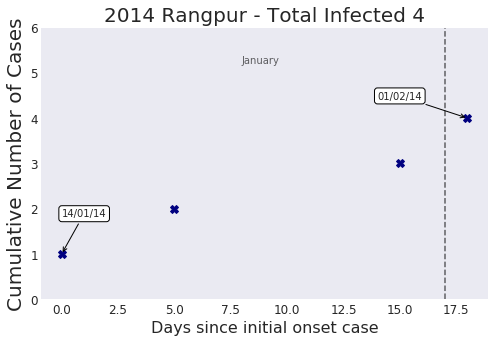

In [233]:

sns.set_style('dark')
plt.figure(figsize = (8,5))
# ax1 = plt.subplot(111)
# plt.plot([a- records[0][0] for a in records[0]], data[0]['CumsumInf'], 'X', markersize = 8, color = 'purple');
# # plt.xticks(records[0], data[0]['Date'], rotation = 75, fontsize = 16);

# an2 = ax1.annotate("{}".format(data[0]['Date'][0]), xy=(0, 1), xycoords="data",
#                   xytext=(5, 5),
#                   # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
#                   va="top", ha="center",
#                   bbox=dict(boxstyle="round", fc="w"),
#                   arrowprops=dict(arrowstyle="->"))
# an3 = ax1.annotate("{}".format(data[0]['Date'].values[-1]), xy=([a- records[0][0] for a in records[0]][-1], 36), xycoords="data",
#                   xytext=(49, 34),
#                   # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
#                   va="top", ha="center",
#                   bbox=dict(boxstyle="round", fc="w"),
#                   arrowprops=dict(arrowstyle="->"))

# plt.plot([10, 10], [0, 40], '--', color = 'black', alpha = 0.6)
# plt.text(0, 36.5, 'February', color = 'black', alpha = 0.6)

# plt.plot([41, 41], [0, 40], '--', color = 'black', alpha = 0.6)
# plt.text(23, 36.5, 'March', color = 'black', alpha = 0.6)
# # plt.plot([71, 71], [0, 40], '--', color = 'black', alpha = 0.6)
# plt.text(50, 36.5, 'April', color = 'black', alpha = 0.6)
# plt.ylim([0, 40])
# plt.yticks(fontsize = 12)
# plt.xticks(fontsize = 12)

# plt.ylabel('Cumulative Number of Cases', fontsize = 16)
# plt.xlabel('Days since initial onset case', fontsize = 16)
# plt.title('{} - Total Infected {}'.format(names[0], data[0]['CumsumInf'].values[-1]), fontsize = 20)

######################################################################################################
######################################################################################################

# ax2 = plt.subplot(111)
# plt.plot([a- records[3][0] for a in records[3]], data[3]['CumsumInf'], 'X', markersize = 8, color = 'purple');
# # plt.xticks(records[3], data[3]['Date'], rotation = 75, fontsize = 16);

# plt.yticks(fontsize = 16)
# plt.ylabel('Cumulative Number of Cases', fontsize = 20)
# plt.title('{} - Total Infected {}'.format(names[3], data[3]['CumsumInf'].values[-1]), fontsize = 20)
# plt.plot([30, 30], [0, 20], '--', color = 'black', alpha = 0.6)
# plt.text(5, 18, 'December', color = 'black', alpha = 0.6)
# an4 = ax2.annotate("{}".format(data[3]['Date'][0]), xy=(0, 1), xycoords="data",
#                   xytext=(5, 5),
#                   # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
#                   va="top", ha="center",
#                   bbox=dict(boxstyle="round", fc="w"),
#                   arrowprops=dict(arrowstyle="->"))
# an5 = ax2.annotate("{}".format(data[3]['Date'].values[-1]), xy=([a- records[3][0] for a in records[3]][-1], data[3]['CumsumInf'].values[-1]), xycoords="data",
#                   xytext=(105, 17),
#                   # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
#                   va="top", ha="center",
#                   bbox=dict(boxstyle="round", fc="w"),
#                   arrowprops=dict(arrowstyle="->"))
# plt.plot([61, 61], [0, 20], '--', color = 'black', alpha = 0.6)
# plt.text(39, 18, 'January', color = 'black', alpha = 0.6)
# plt.ylim([0,20])
# plt.plot([89, 89], [0, 20], '--', color = 'black', alpha = 0.6)
# plt.text(68, 18, 'February', color = 'black', alpha = 0.6)
# plt.ylim([0,20])
# plt.yticks(fontsize = 12)
# plt.xticks(fontsize = 12)
# plt.xlabel('Days since initial onset case', fontsize = 16)

# # plt.plot([89+31, 89+31], [0, 20], '--', color = 'black', alpha = 0.6)
# plt.text(68+31, 18, 'March', color = 'black', alpha = 0.6)
# plt.ylim([0,20])

# #########################################################################################################
# #########################################################################################################
# ax3 = plt.subplot(111)
# plt.plot([a- records[6][0] for a in records[6]], data[6]['CumsumInf'], 'X', markersize = 8, color = 'navy');
# # plt.xticks(records[6], data[6]['Date'], rotation = 75, fontsize = 16);
# plt.yticks(fontsize = 16)
# plt.ylabel('Cumulative Number of Cases', fontsize = 20)
# plt.title('{} - Total Infected {}'.format(names[6], data[6]['CumsumInf'].values[-1]), fontsize = 20)

# an6 = ax3.annotate("{}".format(data[6]['Date'][0]), xy=(0, 1), xycoords="data",
#                   xytext=(1, 3),
#                   # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
#                   va="top", ha="center",
#                   bbox=dict(boxstyle="round", fc="w"),
#                   arrowprops=dict(arrowstyle="->"))
# an7 = ax3.annotate("{}".format(data[6]['Date'].values[-1]), xy=([a- records[6][0] for a in records[6]][-1], data[6]['CumsumInf'].values[-1]), xycoords="data",
#                   xytext=(32, 6),
#                   # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
#                   va="top", ha="center",
#                   bbox=dict(boxstyle="round", fc="w"),
#                   arrowprops=dict(arrowstyle="->"))
# plt.plot([5, 5], [0, 10], '--', color = 'black', alpha = 0.6)
# plt.text(0, 9, 'January', color = 'black', alpha = 0.6)

# plt.plot([5+28, 5+28], [0, 10], '--', color = 'black', alpha = 0.6)
# plt.text(18, 9, 'February', color = 'black', alpha = 0.6)
# plt.yticks(fontsize = 12)
# plt.xticks(fontsize = 12)
# plt.xlabel('Days since initial onset case', fontsize = 16)
# plt.ylim([0,10])

# ##########################################################################################################
# ##########################################################################################################
ax4 = plt.subplot(111)
plt.plot([a- records[9][0] for a in records[9]], data[9]['CumsumInf'], 'X', markersize = 8, color = 'navy');
# plt.xticks(records[9], data[9]['Date'], rotation = 75, fontsize = 16);
plt.yticks(fontsize = 16)

an8 = ax4.annotate("{}".format(data[9]['Date'][0]), xy=(0, 1), xycoords="data",
                  xytext=(1, 2),
                  # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
                  va="top", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
an9 = ax4.annotate("{}".format(data[9]['Date'].values[-1]), xy=([a- records[9][0] for a in records[9]][-1], data[9]['CumsumInf'].values[-1]), xycoords="data",
                  xytext=(15, 4.6),
                  # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
                  va="top", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
plt.plot([17, 17], [0, 6], '--', color = 'black', alpha = 0.6)
plt.text(8, 5.2, 'January', color = 'black', alpha = 0.6)
plt.ylim([0,6])
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('Days since initial onset case', fontsize = 16)
plt.ylabel('Cumulative Number of Cases', fontsize = 20)
plt.title('{} - Total Infected {}'.format(names[9], data[9]['CumsumInf'].values[-1]), fontsize = 20)


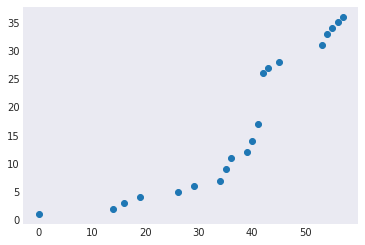

In [137]:
plt.plot([a-19 for a in Rec_F04], Data_F04['CumsumInf'].values, 'o')